#                                          Transport Optimal

In [1]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.optimize import linprog
import numpy as np
import math
import ot
from ot.datasets import make_1D_gauss as gauss


Populating the interactive namespace from numpy and matplotlib


 - Fonction qui trouve le couplage optimal entre deux distrubions discretes p et q relativement à un cout C donné par la méthode du simplexe révisé : 

In [2]:
def dot(C,p,q): # Cost and two diracs distributions p,q in array type
    (m,n) = C.shape
    C_vec = C.reshape((m*n, 1), order='F') # Vectorize matrix 
    b = np.hstack([p, q]) 
    
    # Construct matrix A by Kronecker product   
    A1 = np.kron(np.ones((1, n)), np.identity(m))
    A2 = np.kron(np.identity(n), np.ones((1, m)))
    A  = np.vstack([A1, A2])
    
    # Solve the primal problem : 
    res = linprog(C_vec, A_eq=A[:-1], b_eq=b[:-1], method='Revised simplex')
    
    
    return [res.x.reshape((m,n), order='F'), res.fun] #Un couplage optimal , Optimal Cost

- Remarque :
la forme de la matrice A danas le code s'obbtient en traduisant les contraintes pour un vecteur x qui repsente une vectorisation da la matrice du couplage.

## Simulation du transport optimal entre deux distrubitons discretes aleatoires dans le plan 

In [48]:
# Nombre des points des deux distributions 
M = 10
N = 10

# Distribution source 
u_x = np.random.uniform(0,20, M)
u_y = np.random.uniform(0,50, M)

                                                                                         #p=[1]*M
p_max = 10
p =np.random.randint(1,p_max,M) # Masse aleatoire entiere 


# Distribution cible
v_x = np.random.uniform(20,40, N)
v_y = np.random.uniform(40,60, N)

                                                                                        #q=[1]*N
q_max = int(sum(p)/(N-1))
q = np.random.randint(1,q_max,N-1)
q = np.append(q, sum(p)-sum(q)) # Masse pesudo aleatoire faisable à partir de p

####---------------------------------------------------------------------------------print(p,q,sum(p),sum(q))

# La matrice des couts : distance euclidien 
C = np.zeros((M,N))
for i in range(M):
    for j in range(N):
        C[i][j] = math.sqrt( (u_x[i]-v_x[j])**2 + (u_y[i]-v_y[j])**2 )


####---------------------------------------------------------------------------------print(C)

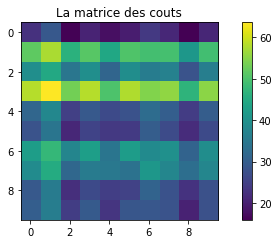

In [4]:
# Tracer la matrice des couts
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data2D = np.random.random((50, 50))
C_fig = plt.imshow(C)
plt.colorbar(C_fig)
plt.title('La matrice des couts')
plt.show()

In [5]:
# Resoudre le probleme du transport Optimal
Pi, W = dot(C,p,q)

le cout du transport optimal est: 1910.0637372799292


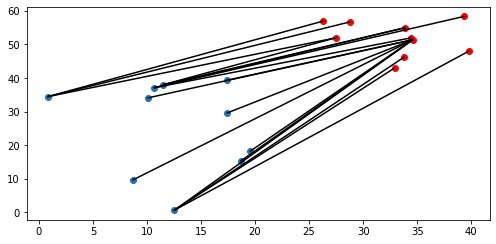

la matrice du couplage optimal est:


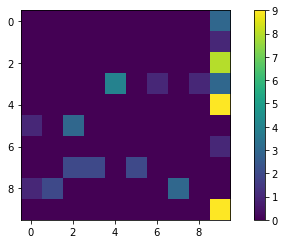

In [6]:
# Ploter les deux distributions et les assigenements optimaux 

plt.scatter(u_x, u_y)
plt.scatter(v_x, v_y, c='r')
for i in range(M):
    for j in range(N):
        if Pi[i][j] != 0 :
            plt.plot([u_x[i], v_x[j]], [u_y[i], v_y[j]], c='black')
print('le cout du transport optimal est:',W)
plt.show()

print('la matrice du couplage optimal est:')

# Tracer la matrice du Couplage optimal
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
Pi_fig = plt.imshow(Pi)
plt.colorbar(Pi_fig)
plt.show()

# Simulation d'un transport montone entre deux distrubitions 1D

In [62]:

# Nombre des points des deux distributions 
M = 50
N = 50

# Distribution source 
u_x = [0 for k in range(M)]
u_y = [(k**2)/(M-1) for k in range(M)]                                                                                      
p = np.array([ k for k in range(M)])  
p=p/sum(p)

# Distribution cible
v_x = [(N-k)/(N-1) for k in range(N)]
v_y = [0 for k in range(N)]
q = np.array([k for k in range(N)])
q=q/sum(q)                                                                                       

# La matrice des couts : distance euclidien 
C = np.zeros((M,N))
for i in range(M):
    for j in range(N):
        C[i][j] = math.sqrt( (u_x[i]-v_x[j])**2 + (u_y[i]-v_y[j])**2 )


####---------------------------------------------------------------------------------print(C)

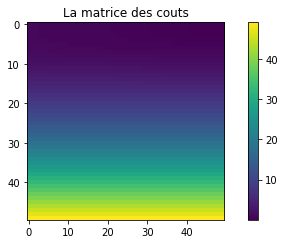

In [63]:
# Tracer la matrice des couts
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data2D = np.random.random((50, 50))
C_fig = plt.imshow(C)
plt.colorbar(C_fig)
plt.title('La matrice des couts')
plt.show()

In [64]:


# Resoudre le probleme du transport Optimal
Pi, W = dot(C,p,q)

le cout du transport optimal est: 25.002468968181446


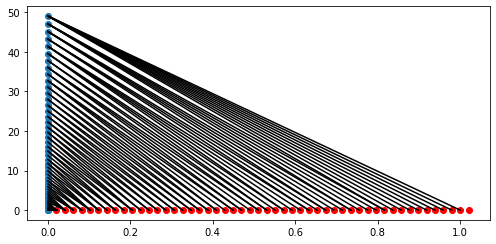

la matrice du couplage optimal est:


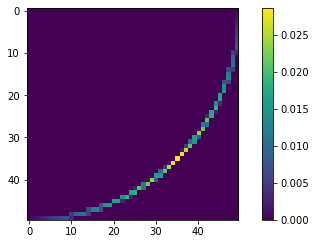

In [65]:
# Ploter les deux distributions et les assigenements optimaux 

plt.scatter(u_x, u_y)
plt.scatter(v_x, v_y, c='r')
for i in range(M):
    for j in range(N):
        if Pi[i][j] != 0 :
            plt.plot([u_x[i], v_x[j]], [u_y[i], v_y[j]], c='black')
print('le cout du transport optimal est:',W)
plt.show()

print('la matrice du couplage optimal est:')

# Tracer la matrice du Couplage optimal
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
Pi_fig = plt.imshow(Pi)
plt.colorbar(Pi_fig)
plt.show()

In [66]:
print(Pi)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.00081633]
 [0.         0.         0.         ... 0.         0.         0.00163265]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00081633 0.00163265 ... 0.         0.         0.        ]]


# Comparaison de la distance de Wassertein et la distance euclidien

Pour illustrer cette comparaistion nous avons utlisé le bibliothèque POT du transport optimal sur python, en effet l'algolrithme du simplexe revisé nous n'a pas permis de faire la simulation vue que les valeurs de la gaussiens deviennent tres faible et depasse le taux de tolérance de l'algorithme.

In [41]:
n = 100  # nb bins
n_target = 15  # nb target distributions


# bin positions
x = np.arange(n, dtype=np.float64)

lst_m = np.linspace(20, 90, n_target)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std

B = np.zeros((n, n_target))

for i, m in enumerate(lst_m):
    B[:, i] = gauss(n, m=m, s=5)

# loss matrix and normalization
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)), 'euclidean')
M /= M.max()
M2 = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)), 'sqeuclidean')
M2 /= M2.max()

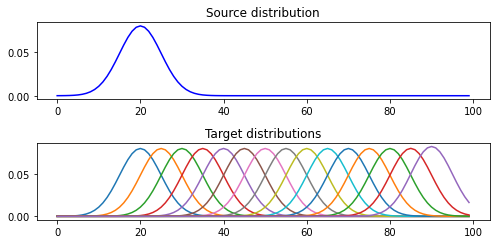

In [42]:
pl.figure(1)
pl.subplot(2, 1, 1)
pl.plot(x, a, 'b', label='Source distribution')
pl.title('Source distribution')
pl.subplot(2, 1, 2)
pl.plot(x, B, label='Target distributions')
pl.title('Target distributions')
pl.tight_layout()

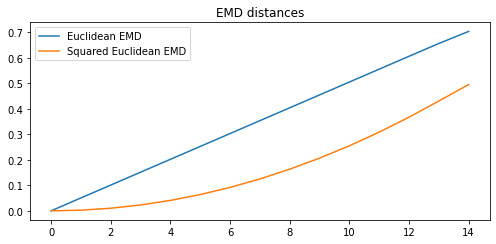

In [43]:
d_emd = ot.emd2(a, B, M)  # direct computation of EMD
d_emd2 = ot.emd2(a, B, M2)  # direct computation of EMD with loss M2


pl.figure(2)
pl.plot(d_emd, label='Euclidean EMD')
pl.plot(d_emd2, label='Squared Euclidean EMD')
pl.title('EMD distances')
pl.legend()

In [44]:
def eucli(a,B,q=2):
    
    
    l = []
    s = 0
    for i in range(B.shape[1]-1):
        
        s = 0
        
        for j in range(B.shape[0]-1) :
            
        
            s = s + abs(a[j]**q - B[:,i][j]**q )
            
        l.append((s**(1/q)))
        
        
    return l
        
        

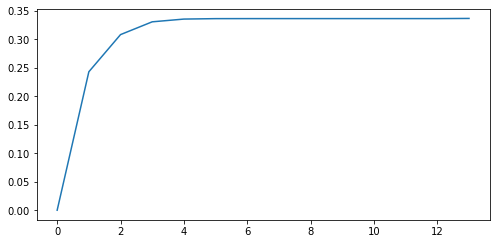

In [45]:
pl.plot(eucli(a,B,2), label='Squared Euclidean EMD')

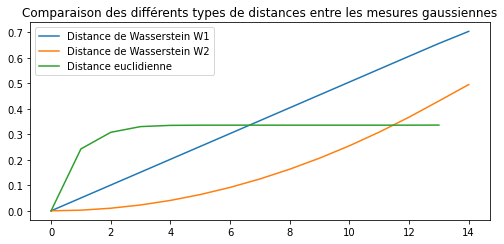

In [47]:
pl.figure(10)
pl.plot(d_emd, label='Distance de Wasserstein W1')
pl.plot(d_emd2, label='Distance de Wasserstein W2')
pl.plot(eucli(a,B,2), label='Distance euclidienne')
#pl.plot(eucli(a,B,3), label='Distance euclidienne 3')
pl.title('Comparaison des différents types de distances entre les mesures gaussiennes')
pl.legend()